In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve

Carga de Datos

In [49]:
tc_data = pd.read_csv('fraude_tc.csv')

## Columnas <br>
distance_from_home - la distancia a la que la transacción ocurrió desde la dirección de facturación <br>
distance_from_last_transaction - la distancia de la última transacción<br>
ratio_to_median_purchase_price - ratio_to_median_purchase_price<br>
repeat_retailer - si la transacción se dió sobre un retailer repetido<br>
used_chip - si la transacción es por chip <br>
usedpinnumber - si la transacción es por PIN <br>
online_order - si la transacción es online<br>
fraud - si la transacción fue o no fraudulenta<br>

In [50]:
tc_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Cantidad de registros con fraude 

In [51]:
tc_data.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

El 8.74% de los registros son casos de fraudes

In [52]:
porcentaje = tc_data.fraud.value_counts()/ tc_data.shape[0]*100
porcentaje

0.0    91.2597
1.0     8.7403
Name: fraud, dtype: float64

Verifico si existen columnas con datos nulos

In [53]:
total = tc_data.isnull().sum().sort_values(ascending=False)
percent = (tc_data.isnull().sum()/tc_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
distance_from_home,0,0.0
distance_from_last_transaction,0,0.0
ratio_to_median_purchase_price,0,0.0
repeat_retailer,0,0.0
used_chip,0,0.0
used_pin_number,0,0.0
online_order,0,0.0
fraud,0,0.0


In [54]:
tc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


ratio_to_median_purchase_price vs fraud

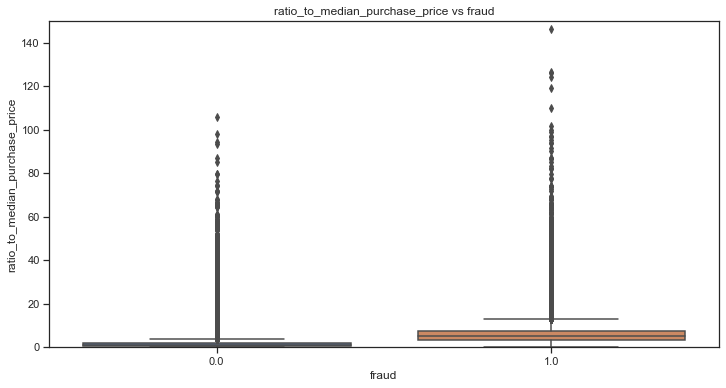

In [66]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x = 'fraud', y = 'ratio_to_median_purchase_price', data = tc_data)
ax.set_ylim([0, 150])
plt.title('ratio_to_median_purchase_price vs fraud')
plt.show()

In [55]:
tc_data[(tc_data.online_order==1) & (tc_data.used_chip==1)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
10,14.263530,0.158758,1.136102,1.0,1.0,0.0,1.0,0.0
11,13.592368,0.240540,1.370330,1.0,1.0,0.0,1.0,0.0
15,179.665148,0.120920,0.535640,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999982,3.805818,0.685528,0.336647,1.0,1.0,0.0,1.0,0.0
999987,12.539374,1.773940,0.792166,1.0,1.0,0.0,1.0,0.0
999990,20.334489,11.437333,0.699527,1.0,1.0,0.0,1.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0


In [69]:
def Accuracy_score_model(data,model):

    #Defino columna target y features
    X=data.drop(['fraud'], axis = 1) 
    y=data['fraud']
    
    #Separo los registros para entrenamiento y validacion
    X_train, X_Test, y_train, y_Test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

    #Entreno mi modelo
    model.fit(X_train, y_train)

    #Calculo prediccion
    yPred= model.predict(X_Test)

    ac = accuracy_score(y_Test, yPred) 
    print("Accuracy " + str(ac)) 
  
    prec = precision_score(y_Test, yPred) 
    print("Precision " + str(prec)) 
  
    rec = recall_score(y_Test, yPred) 
    print("Recall " + str(rec)) 
  
    f1 = f1_score(y_Test, yPred) 
    print("F1-Score " + str(f1)) 


    #Visualizacion de matriz de Confusion
    LABELS = ['Normal', 'Fraud'] 
    conf_matrix = confusion_matrix(y_Test, yPred) 
    plt.figure(figsize =(12, 12)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show() 

    fpr, tpr, t = roc_curve(y_Test, yPred)
    plot_roc(fpr,tpr)
    
    

In [68]:
def plot_roc(fpr,tpr):
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


Random Forest

Accuracy 0.99999
Precision 1.0
Recall 0.9998849582973828
F1-Score 0.9999424758398527


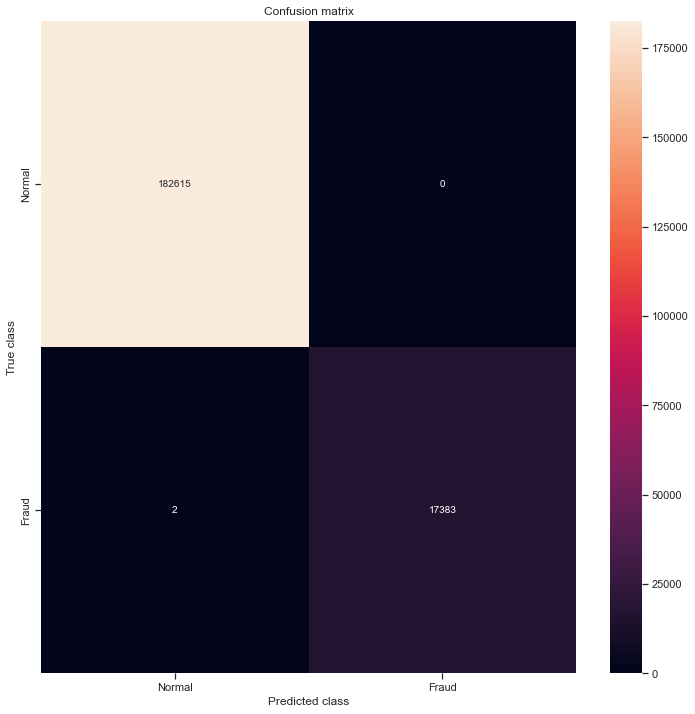

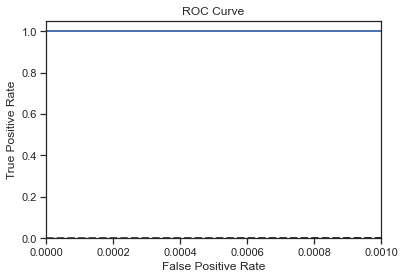

In [70]:
rfc = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
Accuracy_score_model(tc_data,rfc)

Regresion Logistica

c:\Users\Cecilia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.9579
Precision 0.8866557405330803
Recall 0.5912568306010929
F1-Score 0.709434743598592


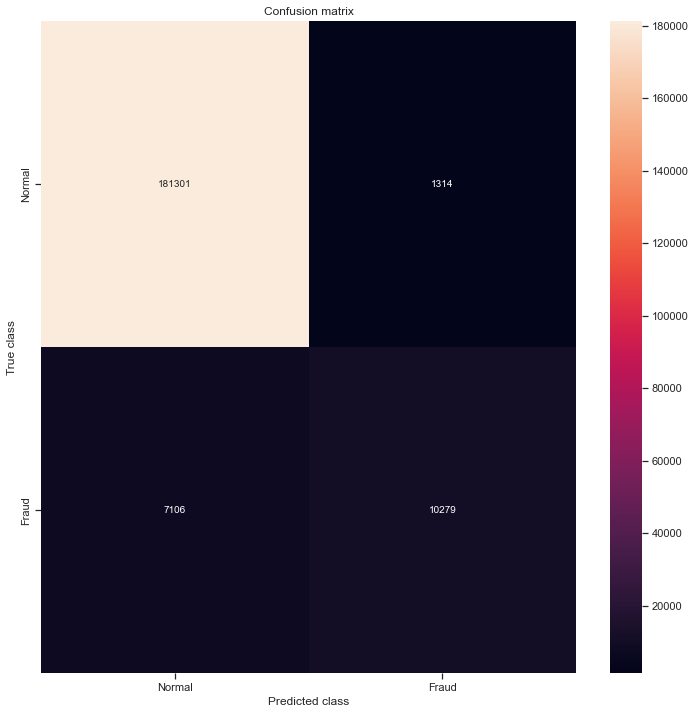

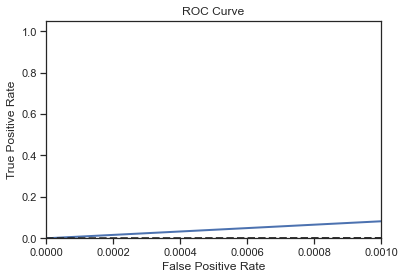

In [71]:
logreg=LogisticRegression()
Accuracy_score_model(tc_data,logreg)

Accuracy 0.99996
Precision 1.0
Recall 0.9995398331895312
F1-Score 0.9997698636442093


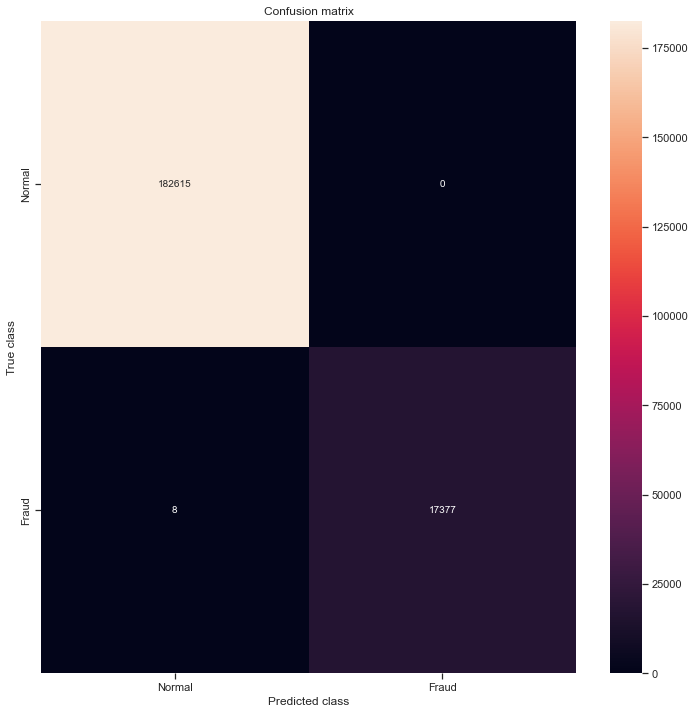

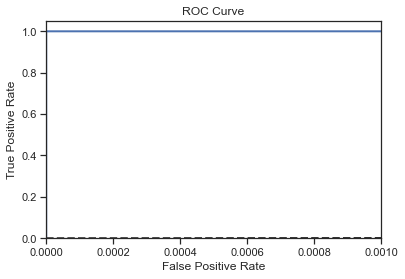

In [72]:
clf = AdaBoostClassifier(random_state=0,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)
Accuracy_score_model(tc_data,clf)

0:	total: 210ms	remaining: 1m 45s
50:	total: 12.1s	remaining: 1m 46s
100:	total: 26.1s	remaining: 1m 42s
150:	total: 39.8s	remaining: 1m 32s
200:	total: 53.6s	remaining: 1m 19s
250:	total: 1m 6s	remaining: 1m 6s
300:	total: 1m 20s	remaining: 53.1s
350:	total: 1m 34s	remaining: 40s
400:	total: 1m 48s	remaining: 26.8s
450:	total: 2m 1s	remaining: 13.2s
499:	total: 2m 14s	remaining: 0us
Accuracy 0.99891
Precision 0.9912436330338236
Recall 0.9962611446649411
F1-Score 0.9937460554248666


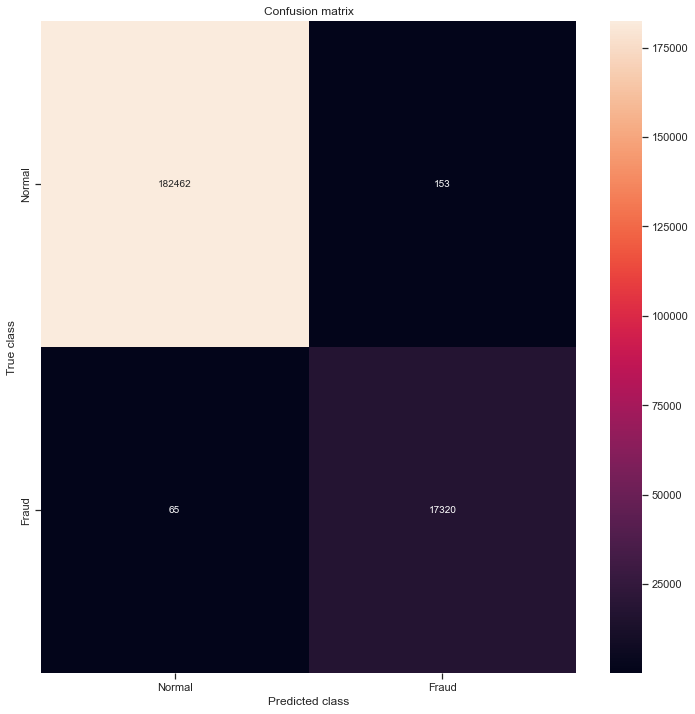

In [63]:
ctbc = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 0,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)
Accuracy_score_model(tc_data,ctbc)